In [332]:
import pandas as pd
import sqlite3

## connection to the database

In [333]:
con = sqlite3.connect("../data/checking-logs.sqlite")

 ##  datetime from the pageviews table

In [334]:
df = pd.io.sql.read_sql(
    sql="SELECT timestamp FROM checker WHERE uid LIKE 'user_%'", 
    parse_dates=['timestamp'],
    con=con
)

##  analyze commits

In [335]:
evaluation_bins = [0, 3, 10, 16, 23]
group_names = ['night', 'morning', 'afternoon', 'evening']
df['daytime'] = pd.cut(df['timestamp'].dt.hour, bins = evaluation_bins, labels = group_names, include_lowest = True, ordered=False)
df = df.groupby([df['timestamp'].dt.date, 'daytime']).agg('count')
df.columns = ['count']

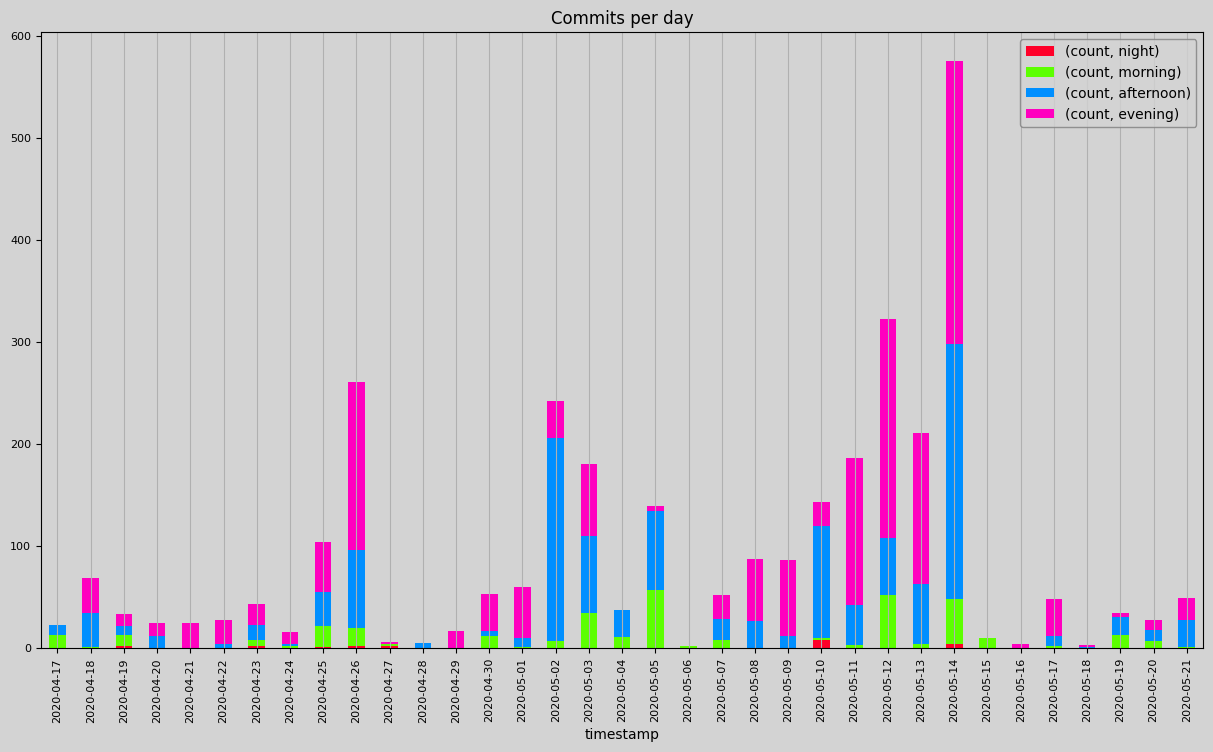

In [336]:
ax = df.unstack(level=1).plot.bar(colormap='gist_rainbow', stacked=True, fontsize=8, figsize=(15,8), title='Commits per day', rot=90)
ax.grid(axis='x')
ax.set_facecolor(color='lightgray')
ax.figure.set_facecolor(color='lightgray')
ax.legend(facecolor='lightgray', edgecolor='gray')

## Close connection

In [337]:
con.close()

## When do our users usually commit the labs: in the night, morning, afternoon, or evening?

Afternoon, evening

## Which day has: the most number of commits and at the same time, the number of commits in the evening is higher than in the afternoon?

2020-05-12